# **Whatsapp Group Chat Analysis**

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 22.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=039455b340106239a1710ae2fcfa523703c1933ed6f05c03d4bd972e98c7f270
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [ ]:
def date(l):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, l)
    if result:
        return True
    return False

In [ ]:
def isauthor(l):
    pattern = [
        '([\w]+):',
        '([\w]+[\s]+[\w]+):',
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',
        '([+]\d{2} \d{5} \d{5}):'
    ]
    patterns = '^' + '|'.join(pattern)
    result = re.match(patterns, l)
    if result:
        return True
    return False

In [ ]:
def DataPoint(line):
    SplitLine = line.split(' - ')
    DT = SplitLine[0]
    DateTime = DT.split(', ')
    Date = DateTime[0]
    Time = DateTime[1]
    Message = ' '.join(SplitLine[1:])

    if isauthor(Message):
        authormes = Message.split(': ')
        Author = authormes[0]
        Message = ' '.join(authormes[1:])
    else:
        Author = None
    return Date, Time, Author, Message

In [ ]:
parsedData = []
FilePath = '/content/WhatsApp Chat with Group 7.txt'
with open(FilePath) as fp:

    messageBuffer = []
    Date, Time, Author = None, None, None

    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date(line):
            if len(messageBuffer) > 0:
                parsedData.append([Date, Time, Author,' '.join(messageBuffer)])
            messageBuffer.clear()
            Date, Time, Author, Message = DataPoint(line)
            messageBuffer.append(Message)
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])

In [ ]:
### Checking shape of dataset.
df.shape
### Checking basic information of dataset
df.info()
### Checking no. of null values in dataset
df.isnull().sum()
### Checking head part of dataset
df.head(50)
### Checking tail part of dataset
df.tail(50)
df = df.reset_index(drop=True)
df.shape
### Checking no. of authors of group
df['Author'].nunique()
### Checking authors of group
df['Author'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     294 non-null    object
 1   Time     294 non-null    object
 2   Author   289 non-null    object
 3   Message  294 non-null    object
dtypes: object(4)
memory usage: 9.3+ KB


array([None, 'Pratheek', 'Rashmi', 'Praneeth Raj', 'Rashi', 'Meghana'],
      dtype=object)

In [ ]:
### Rearranging the columns for better understanding
df = df[['Date','Time','Author','Message']]
### Looking newborn dataset.
df.head()
### Counting number of letters in each message
df["Letter's"] = df["Message"].apply(lambda s : len(s))
### Counting number of word's in each message
df["Word's"] = df["Message"].apply(lambda s : len(s.split(' ')))
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)


### Looking updated dataset
df

,Date,Time,Author,Message,Letter's,Word's,Url_Count
0,20/10/2022,09:21,None,Messages and calls are end-to-end encrypted. N...,139,25,0
1,20/10/2022,09:21,None,"Rashmi created group ""Iot group 7""",34,6,0
2,20/10/2022,09:21,None,Rashmi added you,16,3,0
3,20/10/2022,09:21,None,Rashmi added Pratheek,21,3,0
4,21/10/2022,22:06,Pratheek,Guys,4,1,0
...,...,...,...,...,...,...,...
289,20/11/2022,13:33,Rashi,Do it before 3,14,4,0
290,20/11/2022,13:33,Rashi,Meghana,7,1,0
291,20/11/2022,13:54,Meghana,I will complete,15,3,0
292,20/11/2022,13:54,Meghana,It by today,11,3,0


In [ ]:
NoneValues = df[df['Author'].isnull()]
NoneValues

,Date,Time,Author,Message,Letter's,Word's,Url_Count
0,20/10/2022,09:21,None,Messages and calls are end-to-end encrypted. N...,139,25,0
1,20/10/2022,09:21,None,"Rashmi created group ""Iot group 7""",34,6,0
2,20/10/2022,09:21,None,Rashmi added you,16,3,0
3,20/10/2022,09:21,None,Rashmi added Pratheek,21,3,0
62,02/11/2022,10:01,None,"Rashmi changed the subject from ""Iot group 7"" ...",58,11,0


In [ ]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]

print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))


Group Chatting Stats : 
Total Number of Messages : 294
Total Number of Media Messages : 10


In [ ]:
df = df.drop(NoneValues.index)

In [ ]:
df

,Date,Time,Author,Message,Letter's,Word's,Url_Count
4,21/10/2022,22:06,Pratheek,Guys,4,1,0
5,21/10/2022,22:07,Pratheek,Decided on what are we doing?,29,6,0
6,21/10/2022,22:58,Rashmi,Sir has told we can't do the project that alre...,81,15,0
7,21/10/2022,22:59,Rashmi,By next month we have to submit something like...,63,12,0
8,21/10/2022,22:59,Rashmi,For review,10,2,0
...,...,...,...,...,...,...,...
289,20/11/2022,13:33,Rashi,Do it before 3,14,4,0
290,20/11/2022,13:33,Rashi,Meghana,7,1,0
291,20/11/2022,13:54,Meghana,I will complete,15,3,0
292,20/11/2022,13:54,Meghana,It by today,11,3,0


Let’s create a time series plot w.r.t. no. of messages :

In [ ]:
z = df['Date'].value_counts()
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)
### Timeseries plot
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title="Analysis of number of message's using TimeSeries plot.", xaxis_title='Month', yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

Analysing Number of Messages Sent by the Group Members

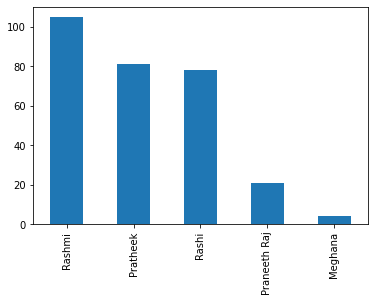

In [ ]:
Toppers = df['Author'].value_counts()
Toppers.plot(kind='bar')

Analysing the Number of Media Messages Sent by the Group Members

In [ ]:
MediaValues = df[df['Message'] == '<Media omitted>']
MediaValues

,Date,Time,Author,Message,Letter's,Word's,Url_Count,Msg_count
110,03/11/2022,11:05,Rashmi,<Media omitted>,15,2,0,63
192,06/11/2022,00:37,Rashmi,<Media omitted>,15,2,0,42
223,06/11/2022,17:02,Pratheek,<Media omitted>,15,2,0,42
244,07/11/2022,10:07,Rashi,<Media omitted>,15,2,0,20
245,07/11/2022,10:49,Praneeth Raj,<Media omitted>,15,2,0,20
248,07/11/2022,11:14,Rashi,<Media omitted>,15,2,0,20
259,09/11/2022,10:23,Pratheek,<Media omitted>,15,2,0,2
266,15/11/2022,17:01,Rashi,<Media omitted>,15,2,0,4
271,18/11/2022,12:42,Rashi,<Media omitted>,15,2,0,3
275,20/11/2022,12:43,Rashi,<Media omitted>,15,2,0,21


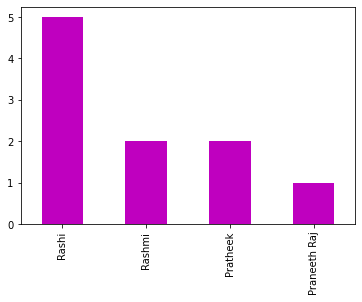

In [ ]:
MediaTopper = MediaValues['Author'].value_counts()
MediaTopper.plot(kind='bar', color='m')

 Frequently used Emojis by the Group Members

In [ ]:
emojis_new=[]
for word in df['Message']:
          emojis = emoji.distinct_emoji_list(word)
          emojis_new.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

emojis_new

[':grinning_face_with_smiling_eyes:',
 ':thumbs_up:',
 ':handshake_light_skin_tone:',
 ':grinning_face_with_sweat:',
 ':grinning_face_with_sweat:',
 ':thumbs_up:',
 ':woman_facepalming_light_skin_tone:',
 ':grinning_face_with_sweat:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':woman_gesturing_OK_light_skin_tone:',
 ':thumbs_up:',
 ':thumbs_up_light_skin_tone:',
 ':thumbs_up_light_skin_tone:',
 ':grinning_face_with_sweat:',
 ':face_with_tears_of_joy:',
 ':thumbs_up_light_skin_tone:',
 ':face_holding_back_tears:',
 ':heart_hands_medium-light_skin_tone:']

Total Message Count

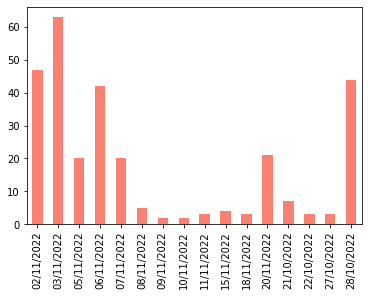

In [ ]:
df['Month_year'] = df['Date']
TopMonth = df['Month_year'].value_counts()
TopMonth = TopMonth.sort_index()
TopMonth.plot(kind='bar', color='salmon')

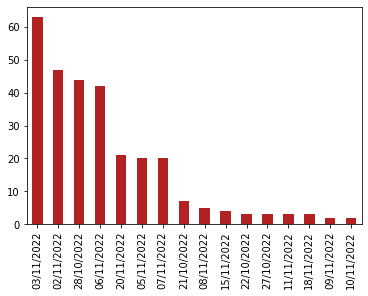

In [ ]:
TopDate = df['Date'].value_counts().head(25)
TopDate.plot(kind='bar', color='firebrick')

Active hours of the WhatsApp Group

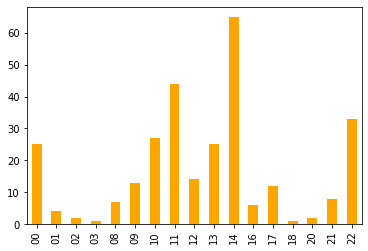

In [ ]:
df['Hour'] = df['Time'].apply(lambda a : a.split(':')[0])
TopHours = df['Hour'].value_counts()
TopHours = TopHours.sort_index()
TopHours.plot(kind='bar', color='orange')

Finding the Letter and Word Count from Each Message

In [ ]:
df = df.drop(MediaValues.index)
df['Letters'] = df['Message'].apply(lambda s : len(s))
df['WordCount'] = df['Message'].apply(lambda s : len(s.split(" ")))

In [ ]:
df

,Date,Time,Author,Message,Letter's,Word's,Url_Count,Msg_count,Month_year,Hour,Letters,WordCount
4,21/10/2022,22:06,Pratheek,Guys,4,1,0,7,21/10/2022,22,4,1
5,21/10/2022,22:07,Pratheek,Decided on what are we doing?,29,6,0,7,21/10/2022,22,29,6
6,21/10/2022,22:58,Rashmi,Sir has told we can't do the project that alre...,81,15,0,7,21/10/2022,22,81,15
7,21/10/2022,22:59,Rashmi,By next month we have to submit something like...,63,12,0,7,21/10/2022,22,63,12
8,21/10/2022,22:59,Rashmi,For review,10,2,0,7,21/10/2022,22,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...
289,20/11/2022,13:33,Rashi,Do it before 3,14,4,0,21,20/11/2022,13,14,4
290,20/11/2022,13:33,Rashi,Meghana,7,1,0,21,20/11/2022,13,7,1
291,20/11/2022,13:54,Meghana,I will complete,15,3,0,21,20/11/2022,13,15,3
292,20/11/2022,13:54,Meghana,It by today,11,3,0,21,20/11/2022,13,11,3


Analysing Which Group Member Has Highest Letter and Word Count

In [ ]:
GroupedData = df.groupby(['Author']).sum()
LetterGroupedData = GroupedData.sort_values(by=['Letters'])
WordGroupedData = GroupedData.sort_values(by=['WordCount'])

In [ ]:
WordGroupedData

,Letter's,Word's,Url_Count,Msg_count,Letters,WordCount
Author,,,,,,
Meghana,35,8,0,84,35,8
Praneeth Raj,699,143,0,516,699,143
Pratheek,1122,239,0,3376,1122,239
Rashi,1709,296,0,2830,1709,296
Rashmi,4767,816,0,4210,4767,816


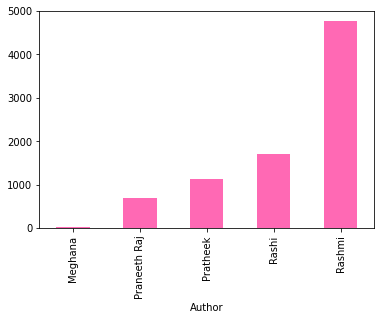

In [ ]:
LetterGroupedData['Letters'].plot(kind='bar', color='hotpink')

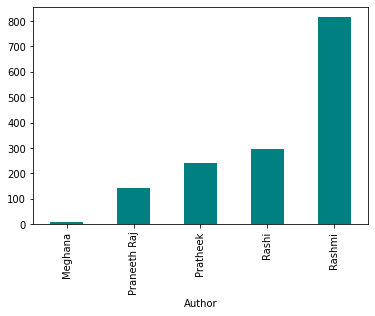

In [ ]:
WordGroupedData['WordCount'].plot(kind='bar', color='teal')

WhatsApp Group Chat Analysis: Word Cloud

In [ ]:
#Now, I will create a Word Cloud for our WhatsApp Group Chat Analysis, to see what the group is based on.
#A Word Cloud is a graph of words which shows the most used words by representing the most used words bigger than the rest:

There are 8610 words in all the messages.


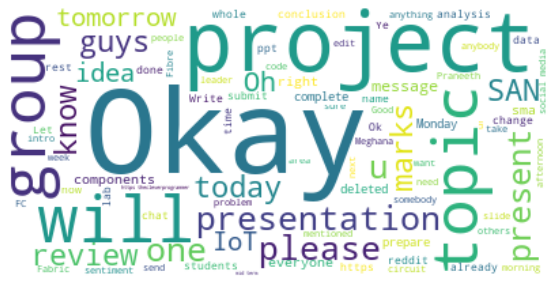

In [ ]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above Word Cloud is based on the chats of the whole group. Now I will look at the Author wise WordCloud:

Author name Rashi


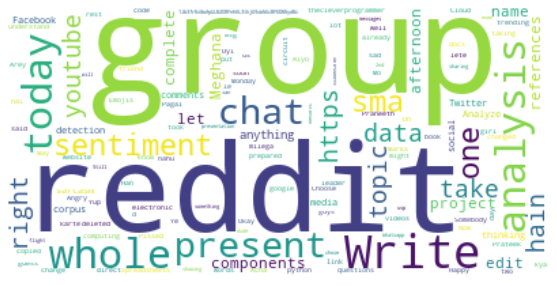

Author name Rashmi


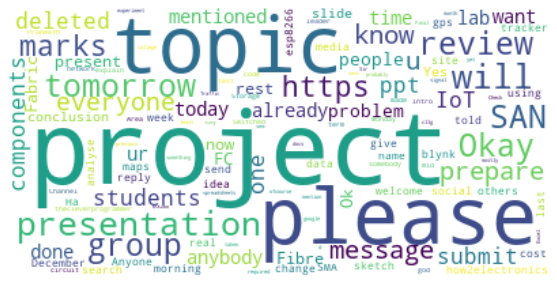

Author name Pratheek


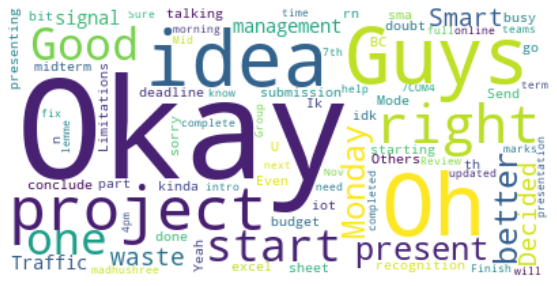

Author name Praneeth Raj


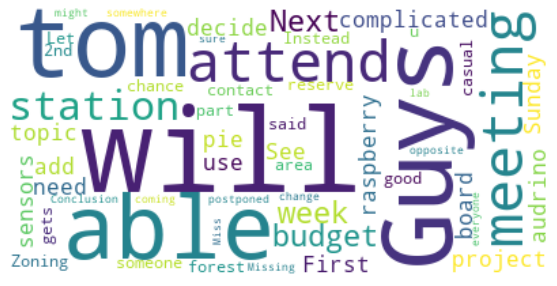

Author name Meghana


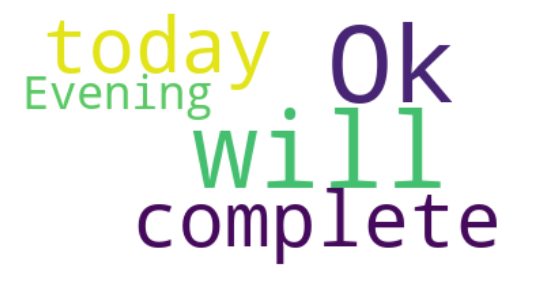

In [ ]:
l = ["Rashi","Rashmi","Pratheek", "Praneeth Raj","Meghana"]
for i in range(len(l)):
  dummy_df = df[df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

SENTIMENT ANALYSIS

In [ ]:
# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [ ]:
# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
data = []
conversation = '/content/WhatsApp Chat with Group 7.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
data = df.dropna()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
print(data.head())

        Date   Time    Author  \
3 2022-10-21  22:06  Pratheek   
4 2022-10-21  22:07  Pratheek   
5 2022-10-21  22:58    Rashmi   
6 2022-10-21  22:59    Rashmi   
7 2022-10-21  22:59    Rashmi   

                                             Message  Positive  Negative  \
3                                               Guys     0.000       0.0   
4                      Decided on what are we doing?     0.000       0.0   
5  Sir has told we can't do the project that alre...     0.000       0.0   
6  By next month we have to submit something like...     0.185       0.0   
7                                         For review     0.000       0.0   

   Neutral  
3    1.000  
4    1.000  
5    1.000  
6    0.815  
7    1.000  


<ipython-input-12-20fd737175b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
<ipython-input-12-20fd737175b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
<ipython-input-12-20fd737175b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
